### **Importing Necessary Modules**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Load Bangle Data**

In [19]:
bangle_data = pd.read_csv("Data/HR_Lab_Data_Day_1/HRV103M_Finger_Anticipatory/bangle.csv")
print(bangle_data.head())

    timestamp_ms  value
0  1723209835425   4030
1  1723209835445   3934
2  1723209835466   3862
3  1723209835489   3770
4  1723209835507   3678


### **Plot Bangle Data**

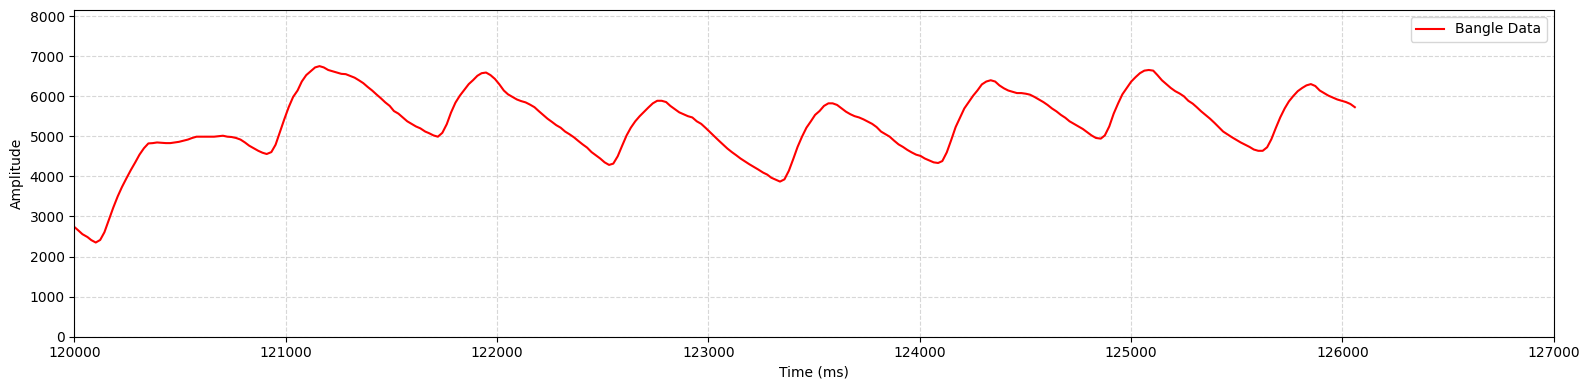

In [20]:
timestamps = bangle_data["timestamp_ms"].to_numpy()
ppg_raw = bangle_data["value"].to_numpy()

' Normalizing timestamp (ms), such that it starts from 0 ms'
t0 = bangle_data["timestamp_ms"].iloc[0]
timestamps = timestamps - t0

plt.figure(figsize=(16, 4))
plt.plot(timestamps, ppg_raw, c='r', label="Bangle Data")
plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(left=120000, right=127000)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

### **Finding Peaks In Filtered PPG Data**

In [21]:
from scipy.signal import find_peaks

dt = np.diff(timestamps) / 1000.0
fs = 1 / np.mean(dt)
print(f"Estimated PPG sampling rate: {fs:.1f} Hz")

min_dist = int(0.5 * fs)
peaks, props = find_peaks(ppg_raw, distance=min_dist, height=np.mean(ppg_raw))
print(peaks)

Estimated PPG sampling rate: 45.4 Hz
[  21   61  101  141  179  220  261  300  339  379  420  459  499  538
  580  694  727  777  807  847  889  927  968 1010 1051 1091 1130 1167
 1205 1241 1276 1313 1349 1387 1425 1464 1502 1540 1577 1618 1656 1697
 1733 1772 1808 1846 1882 1918 1954 1991 2026 2063 2099 2135 2171 2210
 2247 2284 2321 2358 2394 2429 2465 2499 2533 2569 2604 2639 2675 2711
 2747 2784 2822 2861 2897 2932 2968 3003 3038 3074 3108 3146 3184 3224
 3262 3299 3338 3378 3415 3452 3489 3526 3563 3600 3633 3671 3709 3745
 3781 3819 3857 3896 3935 3974 4010 4049 4087 4125 4160 4194 4228 4263
 4297 4336 4373 4410 4448 4485 4522 4562 4601 4638 4677 4717 4756 4795
 4835 4875 4954 4992 5032 5071 5110 5418 5459 5493 5529 5567 5604 5639
 5674 5710]


In [25]:
from scipy.signal import peak_prominences, peak_widths
prominences = peak_prominences(ppg_raw, peaks)
prom_val = prominences[0]
print(prom_val)
print(len(peaks), len(prom_val))
widths = peak_widths(ppg_raw, peaks, rel_height=0.50)[0]
print(widths)
print(len(widths))

[2960. 3088. 3136. 2848. 3008. 3856. 2928. 2944. 3328. 3328. 3562. 3380.
 4276. 3392. 3528. 1504. 7212. 2832. 2424. 1384. 2256. 5834. 3280. 3168.
 3008. 3172. 3188. 3240. 2880. 2624. 2944. 3296. 2656. 2352. 4816. 2400.
 2804. 3056. 2752. 2864. 3848. 3184. 3848. 3216. 3016. 3248. 3048. 3040.
 3538. 3184. 3172. 3172. 3152. 2648. 4832. 3124. 3112. 2896. 3328. 2992.
 3300. 3680. 1016. 5956. 3458. 2744. 3380. 3112. 3328. 2912. 3848. 3120.
 3040. 3336. 2912. 3008. 3648. 2944. 2832. 3112. 3424. 2800. 3154. 2504.
 2144. 3284. 2928. 3312. 2648. 2800. 2664. 2544. 2736. 3080. 2552. 2920.
 3184. 2784. 3024. 2914. 2784. 3330. 2996. 2676. 2848. 2970. 2504. 2432.
 2608. 2472. 1968. 1800. 4708. 2064. 2352. 2400. 2392. 2852. 2256. 2904.
 2568. 2784. 2808. 3504. 2416. 2888. 2944. 2624. 2728. 2368. 4878. 2072.
 1816. 2128.   16. 2880. 1600. 1600. 1488. 1456. 2016.  576.]
142 142
[21.67333333 19.96446078 21.90384615 18.14       20.57983193 23.56967985
 21.10416667 17.8467433  22.43695015 21.76923077 21.71

In [51]:
try:
    from scipy.integrate import trapezoid
    import random
    # # Choose a window size (e.g. 20 points)
    # window = 20

    # peak_idx = random.randint(peaks[0], peaks[len(peaks) - 1]) 
    # if peak_idx == 0:
    #     left = 0
    # else:
    #     left = (peaks[peak_idx - 1] + peaks[peak_idx]) // 2
    # if peak_idx == len(peaks) - 1:
    #     right = len(ppg_raw)
    # else:
    #     right = (peaks[peak_idx] + peaks[peak_idx + 1]) // 2
    # segment = ppg_raw[left:right]
    # baseline = np.min(segment)
    # area = trapezoid(segment - baseline)
    # print(area)

    # # Plot a few random peaks to visualize segments
    # plt.figure(figsize=(12, 6))
    # plt.plot(ppg_raw, label='PPG signal')
    # for idx in np.random.choice(peaks, size=5, replace=False):
    #     start = max(0, idx - window)
    #     end = min(len(ppg_raw), idx + window + 1)
    #     plt.axvspan(start, end, color='orange', alpha=0.3)
    #     plt.plot(idx, ppg_raw[idx], 'ro')  # mark the peak

    # plt.title('Visualization of Pulse Area Segments')
    # plt.xlabel('Sample Index')
    # plt.ylabel('PPG Amplitude')
    # plt.legend()
    # plt.show()

    window = min(5, len(ppg_raw) // 10)
    peak_idx = peaks[52]
    start_idx = max(0, peak_idx - window)
    end_idx = min(len(ppg_raw), peak_idx + window)
    segment = ppg_raw[start_idx:end_idx]
    baseline = np.min(segment)
    adjusted = segment - baseline
    # pulse_area = trapezoid(adjusted, x=None, dx=1)
    pulse_area = np.sum(adjusted)
    print(pulse_area)
except Exception as e:
    print(e)

6852


In [57]:
# RISING (up to peak)
start_rise = max(0, peak_idx - window)
rising_segment = ppg_raw[start_rise:peak_idx+1]
rising_time = timestamps[start_rise:peak_idx+1] / 1000.0  # convert ms to sec

# First derivative (upslope)
rising_dt = np.diff(rising_time)  # shape: (N-1,)
rising_deriv1 = np.diff(rising_segment) / rising_dt
max_upslope = np.max(rising_deriv1) if len(rising_deriv1) > 0 else 0

# INFLECTION (centered on peak)
start_inf = max(0, peak_idx - window)
end_inf = min(len(ppg_raw), peak_idx + window + 1)
segment = ppg_raw[start_inf:end_inf]
segment_time = timestamps[start_inf:end_inf] / 1000.0

# Second derivative (inflection)
dt1 = np.diff(segment_time)         # time between points
deriv1 = np.diff(segment) / dt1     # first derivative (N-1,)
dt2 = (dt1[:-1] + dt1[1:]) / 2      # average dt for 2nd derivative
deriv2 = np.diff(deriv1) / dt2      # second derivative (N-2,)
max_inflection = np.max(np.abs(deriv2)) if len(deriv2) > 0 else 0


# window = min(20, len(ppg_raw) // 10)
# start_idx = max(0, peak_idx - window)
# end_idx = min(len(ppg_raw), peak_idx + window + 1)

# rising_segment = ppg_raw[start_idx:(peak_idx + 1)]
# rising_time = timestamps[start_idx:(peak_idx + 1)]

# segment = ppg_raw[start_idx:end_idx]
# segment_time = timestamps[start_idx:end_idx]

# rising_dt = np.diff(rising_time) / 1000.0
# segment_dt = np.diff(segment_time, n=2) / 1000.0

# rising_deriv1 = np.diff(rising_segment, n=1) / rising_dt
# max_upslope = np.max(rising_deriv1)

# segment_deriv2 = np.diff(segment, n=2) / segment_dt
# max_inflection = np.max(np.abs(segment_deriv2))

print(max_upslope, max_inflection)

20761.904761903974 404645.7607433553


### **Plotting Peaks In Filtered PPG Data**

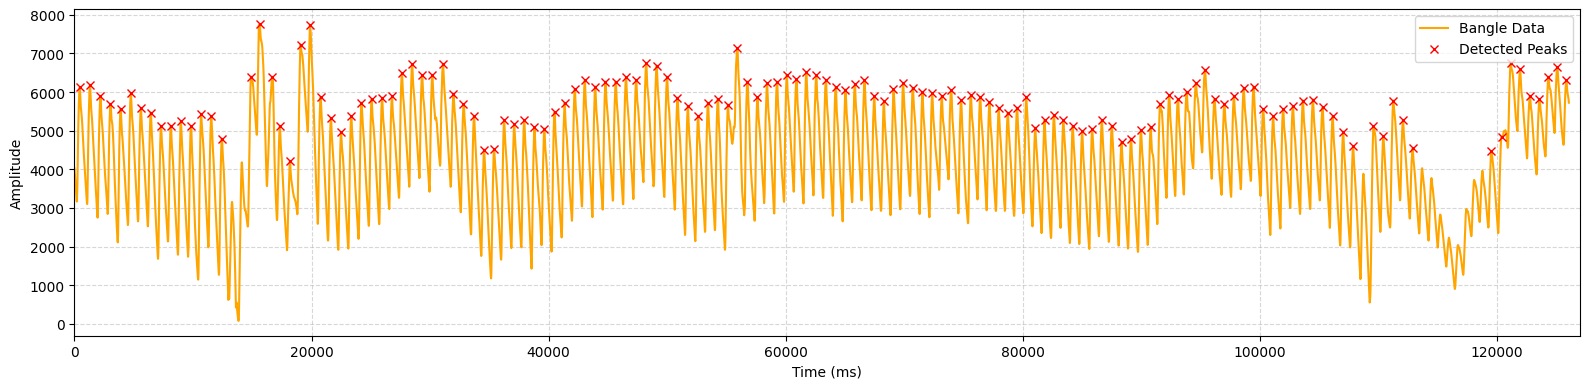

In [23]:
plt.figure(figsize=(16, 4))
plt.plot(timestamps, ppg_raw, c='orange', label="Bangle Data")
plt.plot(timestamps[peaks], ppg_raw[peaks], 'x', c='red', label="Detected Peaks")
plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(left=0, right=127000)
plt.tight_layout()
plt.show()